In [1]:
import streamlit as st
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import * 
from sklearn.metrics import *

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

2022-05-10 19:37:34.428 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [2]:
data = pd.read_csv('data.csv')

In [ ]:
# About dataset, dataset contains information about stroke, exactly we have information about people health, 
# smoking status, their life and by this information we get people has stroke or not

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Cleaning

In [5]:
#we checked null values and filled bmi column by mean
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
bmi_mean = data['bmi'].mean()
data['bmi'] = data['bmi'].fillna(bmi_mean)

In [7]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
#and also checked for duplicates and dropped id column which we dont need
data.duplicated().sum()

0

In [9]:
data.drop(columns=['id'], inplace=True)

# PreProcessing

In [ ]:
#in preprocessing we converted age column's datatype and converted categorical to numeric by label encoder

In [10]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [12]:
data['age'] = data['age'].astype('int32')

In [13]:
categorical_variables = data.select_dtypes(include=['object']).columns.to_list()
categorical_variables

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [14]:
data.drop(data[data.gender == 'Other'].index, axis = 0, inplace=True)

In [15]:
label_encoder = preprocessing.LabelEncoder()
for feature in categorical_variables:
    data[feature]= label_encoder.fit_transform(data[feature])
    data[feature].unique()

In [16]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51,0,0,1,2,0,166.29,25.600000,1,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int32  
 1   age                5109 non-null   int32  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int32  
 5   work_type          5109 non-null   int32  
 6   Residence_type     5109 non-null   int32  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int32  
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int32(6), int64(3)
memory usage: 359.2 KB


# ML algorithms

In [ ]:
# In this part we took 3 algorithms: kmeans(unsupervised), randomforestclassifier(supervised) and linearregression
# and defined learning curve, hyperparameter tuning & optimization etc.

# KMeans

In [ ]:
# KMeans algorithm is unsupervised and we dont need labels, we took two columns avg_glucose_level, bmi, found centroids and clustered

In [18]:
X = data
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

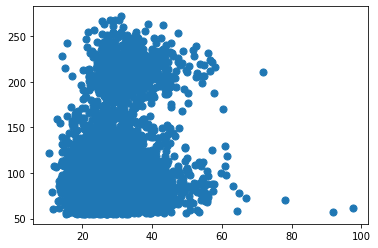

In [19]:
plt.scatter(X.iloc[:, -3], X.iloc[:, -4], s=50);

In [20]:
kmeans.labels_

array([1, 1, 0, ..., 0, 1, 0])

In [21]:
y_kmeans = kmeans.predict(X)

In [22]:
centers = kmeans.cluster_centers_

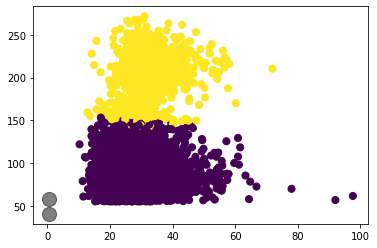

In [23]:
plt.scatter(X.iloc[:, -3], X.iloc[:, -4], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [24]:
kmeans.score(X)

-5071102.299707626

Learning Curve

In [26]:
train_sizes, train_scores, validation_scores = learning_curve(KMeans(), X, y_kmeans)
print('Training scores:\n\n', train_scores)
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -108858.62140555  -105740.88671975  -105750.71350754  -105731.99468936
   -105634.75506813]
 [ -384020.72835817  -409126.57969158  -390846.61958068  -391433.2091926
   -390856.3875286 ]
 [ -646099.10944463  -670226.31905778  -648359.07587461  -664982.58800544
   -664745.33616563]
 [ -892875.47580721  -929768.49480791  -916958.10824015  -935431.0787324
   -934167.14015477]
 [-1153645.47630392 -1191069.94528553 -1168673.04452512 -1196153.91957873
  -1189620.57872008]]

Validation scores:

 [[-322876.15894487 -355587.38780944 -366414.44687954 -350017.5018532
  -331633.57188992]
 [-325915.49267322 -295128.15220223 -318564.6452762  -294189.84469342
  -300917.08135995]
 [-320345.26203053 -297965.38678672 -318082.86680305 -285479.34114328
  -291079.54651461]
 [-336958.52546477 -291025.2401654  -310121.66155989 -284220.45140448
  -289758.7977605 ]
 [-337021.10181874 -289194.16540484 -311758.87287712 -283713.4817449
  -290238.5227463 ]]


hyperparameter tuning & optimization

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X, y_kmeans)

SVC(random_state=0)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'kernel': ['rbf', 'sigmoid'],
          'degree': np.linspace(2, 5, 4),
          'C': np.logspace(-3, 5, 17),
          'gamma': np.logspace(-3, 5, 17)}
grid = RandomizedSearchCV(classifier, param_grid,cv=10, random_state = 0)
grid.fit(X, y_kmeans)

RandomizedSearchCV(cv=10, estimator=SVC(random_state=0),
                   param_distributions={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'degree': array([2., 3., 4., 5.]),
                                        'gamma': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=0)

underfitting & overfitting

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=30) 

def func(cross_val_score):
    mse = np.sqrt(-cross_val_score)
    print(f'mse= {"{:.2f}".format(mse)}')
    
cross_val_score = cross_val_score(KMeans(), X, y_kmeans, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {cross_val_score}')
func(cross_val_score.mean())

Scores for each fold: [-19.36105675 -18.85812133 -15.06947162 -12.83170254 -14.67580803]
mse= 4.02


# RandomForestClassifier

In [ ]:
# in this algorithm we predicted people has stroke or not, firstly we split datasets into train ans test 
# trained then tested it

In [35]:
X = data.drop(columns = ['stroke'], axis=1)
y = data['stroke']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=0)

In [36]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



C:\Users\qyerm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\qyerm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\qyerm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


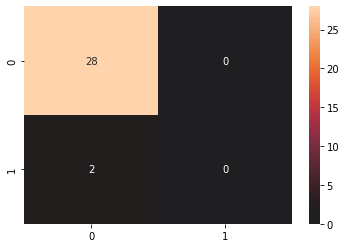

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), center = True,annot=True)
plt.show()

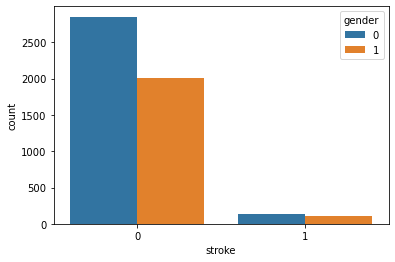

In [47]:
sns.countplot(x='stroke', data=data, hue='gender')
plt.show()

Learning Curve

In [79]:
train_sizes, train_scores, validation_scores = learning_curve(RandomForestClassifier(), X, y)

In [80]:
print('Training scores:\n\n', train_scores)
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         0.99955496]
 [1.         0.99968424 1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]

Validation scores:

 [[0.74266145 0.72896282 0.67808219 0.72994129 0.75514202]
 [0.91878669 0.92074364 0.91682975 0.92074364 0.92066601]
 [0.94324853 0.94716243 0.93737769 0.94324853 0.94221352]
 [0.94618395 0.95009785 0.94324853 0.9481409  0.94906954]
 [0.94911937 0.95009785 0.9481409  0.95009785 0.9510284 ]]


hyperparameter tuning & optimization

In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [82]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'kernel': ['rbf', 'sigmoid'],
          'degree': np.linspace(2, 5, 4),
          'C': np.logspace(-3, 5, 17),
          'gamma': np.logspace(-3, 5, 17)}
grid = RandomizedSearchCV(classifier, param_grid,cv=10, random_state = 0)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(random_state=0),
                   param_distributions={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'degree': array([2., 3., 4., 5.]),
                                        'gamma': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=0)

underfitting & overfitting

In [83]:
kf = KFold(n_splits=5, shuffle=True, random_state=30) 

def func(cross_val_score):
    mse = np.sqrt(-cross_val_score)
    print(f'mse= {"{:.2f}".format(mse)}')
    
cross_val_score = cross_val_score(RandomForestClassifier(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {cross_val_score}')
func(cross_val_score.mean())

Scores for each fold: [-0.03522505 -0.05479452 -0.0518591  -0.06066536 -0.04995103]
mse= 0.22


# Linear Regression

In [ ]:
# we used linear regression for modeling relationships between a dependent variables, exactly bmi and age

In [25]:
X = np.array(data['age']).reshape(-1, 1)
y = np.array(data['bmi']).reshape(-1, 1)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print('Accuracy score:', regr.score(X_test, y_test))

Accuracy score: 0.11562625447459196


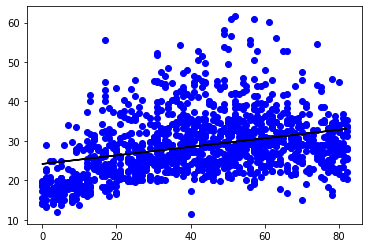

In [26]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

hyperparameter optimization

In [163]:
parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False],  
}
grad_Linear = GridSearchCV(regr, parameters, refit=True)
grad_Linear.fit(X_train, y_train)

print('Best Score: ', grad_Linear.best_score_*100)
print('Best Parameters: ', grad_Linear.best_params_)

Best Score:  11.045933923853646
Best Parameters:  {'fit_intercept': True, 'normalize': False}


In [166]:
reg = LinearRegression(**grad_Linear.best_params_)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print('Accuracy model for test:', round(r2_score(pred, y_test),3))

Accuracy model for test: -7.548
Accuracy model for train: 0.112


underfitting & overfitting

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=30) 
def mse(score):
    mse = np.sqrt(-score)
    print(f'mse= {"{:.2f}".format(mse)}')
score = cross_val_score(linear_model.LinearRegression(), x, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
mse(score.mean())

Learning Curve

In [229]:
train_sizes, train_scores, validation_scores = learning_curve(LinearRegression(), X, y)

In [231]:
print('Training scores:\n\n', train_scores)
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[0.10133595 0.01101346 0.01101346 0.01101346 0.01101346]
 [0.10736097 0.06105607 0.05851401 0.05851401 0.05851401]
 [0.10387278 0.07601875 0.0801019  0.07823252 0.07823252]
 [0.11729127 0.09666756 0.09991286 0.08411011 0.08636858]
 [0.12180066 0.10544945 0.10796184 0.09546895 0.10186795]]

Validation scores:

 [[0.04333977 0.04915725 0.0503814  0.05106621 0.05369624]
 [0.03594325 0.10098416 0.09271992 0.12315265 0.10845617]
 [0.03888645 0.10674374 0.09759985 0.1401425  0.11865393]
 [0.03432156 0.10967427 0.09925607 0.14257384 0.12022612]
 [0.03264199 0.10985996 0.10011054 0.14612313 0.1228266 ]]
